In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [7]:
import os as os
os.chdir('/media/shubham/3AA25FBFA25F7DF7/Data Science/Kaggle/House_price')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train = pd.read_csv('train.csv')

In [9]:
train1 = train
train1.shape

(1460, 62)

In [10]:
mylist = list(train1.select_dtypes(include=['object']).columns)

In [11]:
dummies = pd.get_dummies(train[mylist], prefix= mylist)

In [12]:
dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [13]:
train1.drop(mylist, axis=1, inplace = True)

In [14]:
X = pd.concat([train1,dummies], axis =1 )

In [15]:
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [16]:
x = X.drop('SalePrice', axis=1)

In [17]:
## to increase the number of features
x = pd.concat([x,x,x,x,x], axis=1)

In [18]:
x.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_cv, y_train, y_cv = train_test_split(x, X['SalePrice'])

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor(n_estimators=20)

In [23]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [24]:
rf.score(x_cv,y_cv)

0.88367269301084028

In [25]:
## using svd

In [26]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import scale

In [27]:
x1 = x_train.values
x1 = scale(x1)

/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [28]:
x1.shape

(1095, 1080)

In [31]:
svd = TruncatedSVD(n_components=1079)

In [32]:
svd.fit(x1,y_train)

TruncatedSVD(algorithm='randomized', n_components=1079, n_iter=5,
       random_state=None, tol=0.0)

In [33]:
var = svd.explained_variance_ratio_

In [35]:
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([  6.23,   9.42,  12.26, ...,  99.96,  99.96,  99.96])

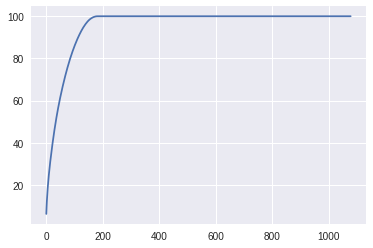

In [36]:
plt.plot(var1)

In [37]:
# using 160 features
svd = TruncatedSVD(n_components=181)
svd.fit(x1,y_train)

TruncatedSVD(algorithm='randomized', n_components=181, n_iter=5,
       random_state=None, tol=0.0)

In [38]:
Y = x_cv.values 

In [39]:
Y1= scale(Y)

/home/shubham/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [40]:
x1 = svd.fit_transform(x1)

In [41]:
y1 = svd.transform(Y1)

In [42]:
rf_svd = RandomForestRegressor(n_estimators=20)

In [43]:
rf_svd.fit(x1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [44]:
rf_svd.score(y1,y_cv)

0.8349255434510765

In [128]:
### running svd on titanic
os.chdir('/media/shubham/3AA25FBFA25F7DF7/Data Science/Titanic---Kaggle-master')
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [132]:
train['Pclass'] = train['Pclass'].astype('object')
dummy = pd.get_dummies(train.loc[:,['Sex','Embarked','Pclass']], prefix = ['Sex','Embarked','Pclass'])
train = pd.concat([train,dummy],axis=1)
train.drop(['Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [137]:
train.drop(['Pclass','Sex'], axis =1 , inplace=True)

In [138]:
x = train.drop('Survived', axis=1)

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [141]:
x_train, x_cv, y_train,y_cv = train_test_split(x, train['Survived'])

In [143]:
x_train.shape

(668, 15)

In [144]:
X = x_train.values
X = scale(X)
Y = x_cv.values
Y = scale(Y)
svd = TruncatedSVD(n_components=14)
svd.fit(X,y_train)

TruncatedSVD(algorithm='randomized', n_components=14, n_iter=5,
       random_state=None, tol=0.0)

In [146]:
var = svd.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals=4)*100)

In [147]:
var1

array([ 22.13,  40.37,  53.57,  65.2 ,  73.25,  80.12,  86.64,  91.59,
        95.17,  98.13,  99.99,  99.99,  99.99,  99.99])

In [148]:
svd = TruncatedSVD(n_components=11)
svd.fit(X,y_train)

TruncatedSVD(algorithm='randomized', n_components=11, n_iter=5,
       random_state=None, tol=0.0)

In [149]:
x1 = svd.fit_transform(X)
y1 = svd.transform(x_cv)

In [150]:
rf = RandomForestClassifier(n_estimators=100)

In [151]:
rf.fit(x1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [152]:
rf.score(y1,y_cv)

0.4349775784753363

In [153]:
rf_1 = RandomForestClassifier(n_estimators=100)

In [154]:
rf_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [155]:
rf_1.score(x_cv,y_cv)

0.7488789237668162